###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Exercise 1: Backward search for variable selection

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp,log,ceil
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 5\\bank.csv",delimiter=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


#### 2 If required drop out the rows with missing values or NA. (hope) in next lectures we will handle sparse data, which will allow us to use records with missing values.

In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### 1 Convert any non-numeric values to numeric values. For example you can replace a country name with an integer value or more appropriately use hot-one encoding. 

In [5]:
df1=pd.get_dummies(df,columns=["job","marital","education","default","housing","loan","contact","poutcome"])
df1.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [6]:
df1["y"] = df1["y"].astype('category')
df1["y"] = df1["y"].cat.codes

In [7]:
df1["month"] = df1["month"].astype('category')
df1["month"] = df1["month"].cat.codes

In [8]:
df2=df1.copy()

#### 4 Normalize (Standardize) the data

In [9]:
for i in df1.columns:
    if i!="y":
        df2[i]=(df1[i]-df1[i].mean())/(df1[i].std())

#### 3 Split the data into a train/test splits according to the ratios 80%:20%

In [10]:
df2_train=df2.sample(frac=0.8,random_state=3116) #random state is a seed value
df2_test=df2.drop(df2_train.index)

In [11]:
X=df2_train.iloc[:,df2_train.columns !="y" ]
y=df2_train.iloc[:,df2_train.columns =="y" ]

#### 5 Implement logistic regression and mini-batch Gradient Ascent.

In [12]:
def create_minibatch(X,y,batch_size):
    mini_batches=[]
    data=np.hstack((X,y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches
    

In [13]:
def logistic_regression(X,y,mu,tmax,epsilon):
    beta=np.zeros((len(X.columns),1))
    
    for i in range(tmax):
        mini_batches = create_minibatch(X, y, 50)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            l=log_function(X_mini,y_mini,beta)
            y_hat=return_yhat(X_mini,beta)
            gradient=find_gradient(X_mini,y_mini,y_hat)
            beta=beta+mu*gradient
        l_old=l
        l=log_function(X_mini,y_mini,beta)
        if (l-l_old < epsilon):
            A=np.dot(X,beta)
            Y_Pred=1.0 / (1.0 + np.exp(-A))
            return Y_Pred
        elif(i==tmax):
            return "Not converged"

def log_function(X,y,beta):
    mul=np.dot(X,beta)
    A=np.dot(y.T,np.dot(X,beta))
    l=A-np.log(1+np.exp(mul))
    
    return l.sum()

# def log_function(X,y,beta):
#     log1=0
#     for i in range(len(X)):
#         log=np.dot(y[i:i+1,:],np.dot(X[i:i+1,:],beta))-np.log(1+exp(np.dot(X[i:i+1,:],beta)))
#         log1+=log    
#     return log1

def return_yhat(X,beta):
    
    A=np.dot(X,beta)
    yhat=1.0 / (1.0 + np.exp(-A))
    return yhat
    
def find_gradient(X,y,y_hat):
    diff=y-y_hat
    grad=np.dot(X.T,diff)
#     print(grad)
    return grad
    
    

#### 6 Keep the hyperparameters of learning rate and batch size fixed (good guesses) and iteratively do backward selection keeping track of the AIC metric.

In [14]:
def find_aic(y,y_Pred,p):
    L=((y*np.log(y_Pred)+(1-y)*np.log(1-y_Pred))).sum()
#     print(L)
    aic=-2*np.log(-L)+2*p
    return aic

def backward_search(X,y):
#     V_used=[0,1,2,3,4,5,6,7,8,9]
    V_used=X.columns.tolist()
    mu=0.001
    tmax=1000
    epsilon=1e-1
    improvement=True
    v_best=[]
    while (improvement):
        gain_best=0
        V_intermediate=V_used.copy()
        if V_used:
            
            for v in (V_used):
                if v in V_intermediate:
                    V_intermediate.remove(v)
                    print("Original V_used",V_used)
                    print("After removal",V_intermediate)
                    Y_Pred=logistic_regression(X[V_intermediate],y,mu,tmax,epsilon)
                    Y_Pred1=logistic_regression(X[V_used],y,mu,tmax,epsilon)
                    p=len(V_intermediate)
                    p1=len(V_used)
                    gain=-find_aic(y,Y_Pred,p)+find_aic(y,Y_Pred1,p1)
                    print("Gain is",gain.item())
    #         improvement=False
                    if gain.item()>gain_best:
                        print("Inside update v_best")
                        gain_best = gain.item()
                        if v not in v_best:
                            v_best.append(v)
                            print("Improved Score",v_best)
                    improvement=(gain_best>0)
                    if improvement:
                        print("Before V_used",V_used)
                        V_used=list(set(V_used)-set(v_best))
                        print("Final V_used",V_used)
            else:
                return V_used

In [15]:
attributes=backward_search(X,y)
print("Final Attributes are",attributes)

Original V_used ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
After removal ['balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'ma

Gain is 4.129773537582423
Inside update v_best
Improved Score ['age', 'day', 'month', 'duration']
Before V_used ['pdays', 'education_tertiary', 'default_yes', 'housing_no', 'job_admin.', 'education_unknown', 'job_student', 'default_no', 'contact_telephone', 'poutcome_failure', 'duration', 'education_secondary', 'education_primary', 'contact_cellular', 'job_retired', 'job_blue-collar', 'campaign', 'job_unknown', 'job_entrepreneur', 'poutcome_success', 'job_services', 'marital_single', 'loan_no', 'job_management', 'job_self-employed', 'previous', 'housing_yes', 'marital_married', 'poutcome_unknown', 'marital_divorced', 'job_technician', 'poutcome_other', 'balance', 'job_unemployed', 'loan_yes', 'job_housemaid', 'contact_unknown']
Final V_used ['pdays', 'education_tertiary', 'default_yes', 'housing_no', 'job_admin.', 'education_unknown', 'job_student', 'default_no', 'contact_telephone', 'poutcome_failure', 'education_secondary', 'education_primary', 'contact_cellular', 'job_retired', 'job

Gain is 8.003181656764184
Inside update v_best
Improved Score ['age', 'day', 'month', 'duration', 'pdays', 'job_admin.']
Before V_used ['education_tertiary', 'default_yes', 'housing_no', 'job_admin.', 'education_unknown', 'job_student', 'default_no', 'contact_telephone', 'poutcome_failure', 'education_secondary', 'education_primary', 'contact_cellular', 'job_retired', 'job_blue-collar', 'campaign', 'job_unknown', 'job_entrepreneur', 'poutcome_success', 'job_services', 'marital_single', 'loan_no', 'job_management', 'job_self-employed', 'previous', 'housing_yes', 'marital_married', 'poutcome_unknown', 'marital_divorced', 'job_technician', 'poutcome_other', 'balance', 'job_unemployed', 'loan_yes', 'job_housemaid', 'contact_unknown']
Final V_used ['education_tertiary', 'default_yes', 'housing_no', 'education_unknown', 'job_student', 'default_no', 'contact_telephone', 'poutcome_failure', 'education_secondary', 'education_primary', 'contact_cellular', 'job_retired', 'job_blue-collar', 'campa

Gain is 11.982126743243064
Before V_used ['education_tertiary', 'default_yes', 'housing_no', 'education_unknown', 'job_student', 'default_no', 'contact_telephone', 'poutcome_failure', 'education_secondary', 'education_primary', 'contact_cellular', 'job_blue-collar', 'campaign', 'job_unknown', 'poutcome_success', 'job_services', 'marital_single', 'loan_no', 'job_management', 'job_self-employed', 'previous', 'housing_yes', 'marital_married', 'poutcome_unknown', 'marital_divorced', 'job_technician', 'poutcome_other', 'balance', 'job_unemployed', 'loan_yes', 'contact_unknown']
Final V_used ['education_tertiary', 'default_yes', 'housing_no', 'education_unknown', 'job_student', 'default_no', 'contact_telephone', 'poutcome_failure', 'education_secondary', 'education_primary', 'contact_cellular', 'job_blue-collar', 'campaign', 'job_unknown', 'poutcome_success', 'job_services', 'marital_single', 'loan_no', 'job_management', 'job_self-employed', 'previous', 'housing_yes', 'marital_married', 'pou

Gain is 16.007579134131802
Before V_used ['education_tertiary', 'default_yes', 'housing_no', 'education_unknown', 'default_no', 'contact_telephone', 'poutcome_failure', 'education_secondary', 'education_primary', 'contact_cellular', 'job_blue-collar', 'campaign', 'poutcome_success', 'marital_single', 'loan_no', 'job_management', 'job_self-employed', 'previous', 'housing_yes', 'marital_married', 'poutcome_unknown', 'marital_divorced', 'job_technician', 'poutcome_other', 'balance', 'loan_yes', 'contact_unknown']
Final V_used ['education_tertiary', 'default_yes', 'housing_no', 'education_unknown', 'default_no', 'contact_telephone', 'poutcome_failure', 'education_secondary', 'education_primary', 'contact_cellular', 'job_blue-collar', 'campaign', 'poutcome_success', 'marital_single', 'loan_no', 'job_management', 'job_self-employed', 'previous', 'housing_yes', 'marital_married', 'poutcome_unknown', 'marital_divorced', 'job_technician', 'poutcome_other', 'balance', 'loan_yes', 'contact_unknow

Gain is 22.01768173548973
Inside update v_best
Improved Score ['age', 'day', 'month', 'duration', 'pdays', 'job_admin.', 'job_entrepreneur', 'job_housemaid', 'job_retired', 'job_services', 'job_student', 'job_unemployed', 'job_unknown', 'marital_married', 'education_primary', 'education_secondary', 'education_unknown']
Before V_used ['education_tertiary', 'default_yes', 'housing_no', 'education_unknown', 'default_no', 'contact_telephone', 'poutcome_failure', 'contact_cellular', 'job_blue-collar', 'campaign', 'poutcome_success', 'marital_single', 'loan_no', 'job_management', 'job_self-employed', 'previous', 'housing_yes', 'poutcome_unknown', 'marital_divorced', 'job_technician', 'poutcome_other', 'balance', 'loan_yes', 'contact_unknown']
Final V_used ['education_tertiary', 'default_yes', 'housing_no', 'default_no', 'contact_telephone', 'poutcome_failure', 'contact_cellular', 'job_blue-collar', 'campaign', 'poutcome_success', 'marital_single', 'loan_no', 'job_management', 'job_self-emplo

Gain is 28.025264990754287
Inside update v_best
Improved Score ['age', 'day', 'month', 'duration', 'pdays', 'job_admin.', 'job_entrepreneur', 'job_housemaid', 'job_retired', 'job_services', 'job_student', 'job_unemployed', 'job_unknown', 'marital_married', 'education_primary', 'education_secondary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_no', 'loan_yes', 'contact_telephone', 'contact_unknown']
Before V_used ['education_tertiary', 'poutcome_unknown', 'job_blue-collar', 'default_no', 'campaign', 'housing_no', 'marital_divorced', 'job_technician', 'poutcome_other', 'poutcome_success', 'balance', 'marital_single', 'poutcome_failure', 'contact_unknown', 'job_management', 'job_self-employed', 'previous', 'contact_cellular']
Final V_used ['education_tertiary', 'poutcome_unknown', 'job_blue-collar', 'campaign', 'default_no', 'housing_no', 'marital_divorced', 'job_technician', 'poutcome_other', 'poutcome_success', 'balance', 'marital_single', 'poutcome_failure', 'job_managemen

In [16]:
X_selected=df2_train[attributes]
y_selected=df2_train.iloc[:,df2_train.columns =="y" ]

X_selected_test=df2_test[attributes]
y_selected_test=df2_test.iloc[:,df2_train.columns =="y" ]
print(np.shape(y_selected_test))

(904, 1)


In [17]:
def logistic_regression(X,y,X_test,Y_test,mu,tmax,epsilon):
    beta=np.zeros((len(X.columns),1))
    
    for i in range(tmax):
        mini_batches = create_minibatch(X, y, 50)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            l=log_function(X_mini,y_mini,beta)
            y_hat=return_yhat(X_mini,beta)
            gradient=find_gradient(X_mini,y_mini,y_hat)
            beta=beta+mu*gradient
        l_old=l
        l=log_function(X_mini,y_mini,beta)
        if (l-l_old < epsilon):
            A=np.dot(X_test,beta)
            Y_Pred_test=1.0 / (1.0 + np.exp(-A))
            error=find_accuracy(Y_test,Y_Pred_test)
            return error
        elif(i==tmax):
            return "Not converged"

def log_function(X,y,beta):
    mul=np.dot(X,beta)
    A=np.dot(y.T,np.dot(X,beta))
    l=A-np.log(1+np.exp(mul))
    
    return l.sum()

# def log_function(X,y,beta):
#     log1=0
#     for i in range(len(X)):
#         log=np.dot(y[i:i+1,:],np.dot(X[i:i+1,:],beta))-np.log(1+exp(np.dot(X[i:i+1,:],beta)))
#         log1+=log    
#     return log1

def return_yhat(X,beta):
    
    A=np.dot(X,beta)
    yhat=1.0 / (1.0 + np.exp(-A))
    return yhat
    
def find_gradient(X,y,y_hat):
    diff=y-y_hat
    grad=np.dot(X.T,diff)
    return grad
    
def find_accuracy(y,Y_Pred):
    Y_Pred_new=[]
    count=0
    accuracy=0
    for i in Y_Pred:
        if i.item()>=0.5:
            Y_Pred_new.append(1)
        else:
            Y_Pred_new.append(0)
    for i in range(len(Y_Pred_new)-1):
        if (type(y).__module__ =='numpy'):
            if (y[i][0]==Y_Pred_new[i]):
                count+=1
        else:
            if (y.iloc[i].item()==Y_Pred_new[i]):
                count+=1
    accuracy=count/len(Y_Pred_new)
#     print("Accuracy is",accuracy)
    return accuracy
#         if (y.iloc[i].item()==Y_Pred_new[i]):  

#### Final Error: 7. Report the final error on Test set

In [18]:
mu=0.0001
tmax=1000
epsilon=1e-1
accuracy=logistic_regression(X_selected,y_selected,X_selected_test,y_selected_test,mu,tmax,epsilon)
print("Final Error on Test Set is",1-accuracy)


Final Error on Test Set is 0.4258849557522124


## Exercise 2: Regularization for Logistic Regression

In [19]:
def crossval_split(X,y,K,k):
    
    N=X.shape[0]
    sample_size=int(N/K)
#     print(np.shape(X))
#     print(np.shape(y))
    X_test = X.iloc[k*sample_size:(k+1)*sample_size,:]
    X_train=np.append(X.iloc[0:k*sample_size,:],X.iloc[(k+1)*sample_size:N,:],axis=0)
    
    y_test=y.iloc[k*sample_size:(k+1)*sample_size,:]
    y_train=np.append(y.iloc[0:k*sample_size,:],y.iloc[(k+1)*sample_size:N,:],axis=0)
#     print(np.shape(X_train),np.shape(y_train))
#     print(np.shape(X_test),np.shape(y_test))
    
    return X_train, y_train, X_test, y_test


In [20]:
def logistic_regression_regularisation(X,y,mu,tmax,epsilon,lambda1):
#     print(np.shape(X))
    beta=np.zeros((X.shape[1],1))
    for i in range(tmax):
        mini_batches = create_minibatch(X, y, 50)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            l=log_function(X_mini,y_mini,beta,lambda1)
            y_hat=return_yhat(X_mini,beta)
            gradient=find_gradient(X_mini,y_mini,y_hat,beta,lambda1)
            beta=beta+mu*gradient
        l_old=l
        l=log_function(X_mini,y_mini,beta,lambda1)
        if (l-l_old < epsilon):
            A=np.dot(X,beta)
            Y_Pred=1.0 / (1.0 + np.exp(-A))
            return Y_Pred
        elif(i==tmax):
            return "Not converged"
    

def log_function(X,y,beta,lambda1):
    mul=np.dot(X,beta)
    A=np.dot(y.T,np.dot(X,beta))
    l=A-np.log(1+np.exp(mul))
    regularisation_term=lambda1*(np.square(beta)).sum()
    return l.sum()-regularisation_term

# def log_function(X,y,beta):
#     log1=0
#     for i in range(len(X)):
#         log=np.dot(y[i:i+1,:],np.dot(X[i:i+1,:],beta))-np.log(1+exp(np.dot(X[i:i+1,:],beta)))
#         log1+=log    
#     return log1

def return_yhat(X,beta):
    
    A=np.dot(X,beta)
    yhat=1.0 / (1.0 + np.exp(-A))
    return yhat
    
def find_gradient(X,y,y_hat,beta,lambda1):
    diff=y-y_hat
    grad=np.dot(X.T,diff)-2*lambda1*beta
    return grad
    
    

In [21]:
def gridsearchcv(mu_arr,lambda1_arr):
    train_accuracy_score=[]
    cv_accuracy_score=[]
    tmax=1000
    epsilon=1e-1
    K=5
    for mu in mu_arr:
        print("For mu",mu)
        
        for lambda1 in lambda1_arr:
            train_accuracy_fold=[]
            cv_accuracy_fold=[]
        
            for fold in range(0,5):
#                 print("Inside Fold",fold)
#                 df2_train=df2.sample(frac=0.8)
#                 df2_cv=df2.drop(df2_train.index)

#                 X=df2_train.iloc[:,df2_train.columns !="y" ]
#                 y=df2_train.iloc[:,df2_train.columns =="y" ]

#                 X_cv=df2_cv.iloc[:,df2_cv.columns !="y" ]
#                 y_cv=df2_cv.iloc[:,df2_cv.columns =="y" ]
                X_train, y_train, X_cv, y_cv=crossval_split(X,y,K,fold)

                Y_Pred_train=logistic_regression_regularisation(X_train,y_train,mu,tmax,epsilon,lambda1)
                Y_Pred_cv=logistic_regression_regularisation(X_cv,y_cv,mu,tmax,epsilon,lambda1)
#                 print(np.shape(Y_Pred_cv))

                train_accuracy_fold.append(find_accuracy(y_train,Y_Pred_train))
#                 print("Train",train_accuracy_fold)
                cv_accuracy_fold.append(find_accuracy(y_cv,Y_Pred_cv))
#                 print("Cross validation",cv_accuracy_fold)
#             print("For Lambda",lambda1)
            train_accuracy_score.append(np.mean(np.array(train_accuracy_fold)))
            cv_accuracy_score.append(np.mean(np.array(cv_accuracy_fold)))
        print(train_accuracy_score)
        print(cv_accuracy_score)
        
    return train_accuracy_score,cv_accuracy_score
            
   
def find_accuracy(y,Y_Pred):
    Y_Pred_new=[]
    count=0
    accuracy=0
    for i in Y_Pred:
        if i.item()>=0.5:
            Y_Pred_new.append(1)
        else:
            Y_Pred_new.append(0)
    for i in range(len(Y_Pred_new)-1):
        if (type(y).__module__ =='numpy'):
            if (y[i][0]==Y_Pred_new[i]):
                count+=1
        else:
            if (y.iloc[i].item()==Y_Pred_new[i]):
                count+=1
    accuracy=count/len(Y_Pred_new)
#     print("Accuracy is",accuracy)
    return accuracy
#         if (y.iloc[i].item()==Y_Pred_new[i]):

#### 1. Pick a range of α0 and λ defined on grid. You can choose fixed batchsize = 50

#### 2. Implement k-fold cross-validation protocol for grid search. For each combination of α0 and λ you will perform k-fold cross-validation. Let k = 5 in this case.


In [51]:
# mu_arr=[0.005,0.001,0.02,0.02,0.003]
mu_arr=[0.0001,0.0002,0.0003,0.0004,0.0005]
lambda1_arr=[0.01,0.02,0.03,0.04,0.05]
train_accuracy_score,cv_accuracy_score=gridsearchcv(mu_arr,lambda1_arr)
# print(train_accuracy_score)
# print(cv_accuracy_score)

For mu 0.0001
[0.6590837282780411, 0.6649289099526067, 0.6576619273301738, 0.6555292259083728, 0.65086887835703]
[0.6714060031595577, 0.6748815165876777, 0.6780410742496051, 0.6726698262243286, 0.6764612954186413]
For mu 0.0002
[0.6590837282780411, 0.6649289099526067, 0.6576619273301738, 0.6555292259083728, 0.65086887835703, 0.6854660347551342, 0.6716429699842023, 0.70173775671406, 0.6746445497630331, 0.6875987361769352]
[0.6714060031595577, 0.6748815165876777, 0.6780410742496051, 0.6726698262243286, 0.6764612954186413, 0.692259083728278, 0.6755134281200632, 0.6865718799368089, 0.6862559241706162, 0.6900473933649288]
For mu 0.0003
[0.6590837282780411, 0.6649289099526067, 0.6576619273301738, 0.6555292259083728, 0.65086887835703, 0.6854660347551342, 0.6716429699842023, 0.70173775671406, 0.6746445497630331, 0.6875987361769352, 0.6834913112164296, 0.6789889415481832, 0.6959715639810427, 0.6986571879936809, 0.7008688783570299]
[0.6714060031595577, 0.6748815165876777, 0.6780410742496051, 0.6

In [52]:
print("Training Accuracy Score per k-Fold is",train_accuracy_score)
print("Validation Accuracy Score per k-Fold is",cv_accuracy_score)

Training Accuracy Score per k-Fold is [0.6590837282780411, 0.6649289099526067, 0.6576619273301738, 0.6555292259083728, 0.65086887835703, 0.6854660347551342, 0.6716429699842023, 0.70173775671406, 0.6746445497630331, 0.6875987361769352, 0.6834913112164296, 0.6789889415481832, 0.6959715639810427, 0.6986571879936809, 0.7008688783570299, 0.7197472353870458, 0.7281990521327014, 0.7095576619273302, 0.7015797788309637, 0.7157977883096367, 0.7178515007898894, 0.7049763033175356, 0.7147709320695104, 0.7302527646129542, 0.7130331753554503]
Validation Accuracy Score per k-Fold is [0.6714060031595577, 0.6748815165876777, 0.6780410742496051, 0.6726698262243286, 0.6764612954186413, 0.692259083728278, 0.6755134281200632, 0.6865718799368089, 0.6862559241706162, 0.6900473933649288, 0.6843601895734597, 0.6843601895734597, 0.6777251184834123, 0.6928909952606636, 0.6969984202211691, 0.6909952606635071, 0.6951026856240127, 0.6868878357030016, 0.7004739336492891, 0.7004739336492891, 0.6963665086887836, 0.706

#### 3. Keep track of mean performance (i.e. Classification Accuracy value) across k − folds for each set of hyperparameters. Plot on the grid α0 vs λ the Classification Accuracy score for all combinations.

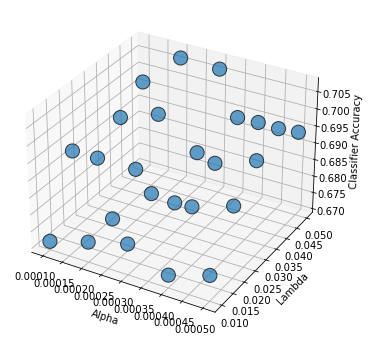

In [53]:
a = np.linspace(0.0001, 0.0005, 5)
b = np.linspace(0.01, 0.05, 5)
A, B = np.meshgrid(a, b)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(A, B, cv_accuracy_score,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           cmap='viridis')
ax.set_xlabel("Alpha")
ax.set_ylabel("Lambda")
ax.set_zlabel("Classifier Accuracy")
plt.show()

In [54]:
#Entire Dataset
X_full=df2.iloc[:,df2.columns !="y" ]
y_full=df2.iloc[:,df2.columns =="y" ]
print(np.shape(X_full))
print(np.shape(y_full))
X_test=df2_test.iloc[:,df2_test.columns !="y" ]
y_yest=df2_test.iloc[:,df2_test.columns =="y" ]

(4521, 40)
(4521, 1)


In [55]:
def logistic_regression_regularisation_final(X,y,X_test,y_test,mu,tmax,epsilon,lambda1):
#     print(np.shape(X))
    train_accuracy=[]
    validation_accuracy=[]
    log_likelihood=[]
    beta=np.zeros((X.shape[1],1))
    for i in range(tmax):
#         print("Here",i)
        mini_batches = create_minibatch(X, y, 50)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            l=log_function(X_mini,y_mini,beta,lambda1)
            y_hat=return_yhat(X_mini,beta)
            gradient=find_gradient(X_mini,y_mini,y_hat,beta,lambda1)
            beta=beta+mu*gradient
        l_old=l
        l=log_function(X_mini,y_mini,beta,lambda1)
        
    
        train_y_predict=return_yhat(X,beta)
        validation_y_predict=return_yhat(X_test,beta)
        
        train_accuracy.append(find_accuracy(y,train_y_predict))
        validation_accuracy.append(find_accuracy(y_test,validation_y_predict))
        log_likelihood.append(log_function(X_test,y_test,beta,lambda1))
        
        
        if (l-l_old < epsilon):
            A=np.dot(X_test,beta)
            Y_Pred=1.0 / (1.0 + np.exp(-A))
            log_likelihood=log_function(X_test,y_test,beta,lambda1)
            accuracy_score=find_accuracy(y_test,Y_Pred)
            return accuracy_score,log_likelihood,train_accuracy,validation_accuracy,log_likelihood
        elif(i==tmax):
            return "Not converged"
    

def log_function(X,y,beta,lambda1):
    mul=np.dot(X,beta)
    A=np.dot(y.T,np.dot(X,beta))
    l=A-np.log(1+np.exp(mul))
    regularisation_term=lambda1*(np.square(beta)).sum()
    return l.sum()-regularisation_term

# def log_function(X,y,beta):
#     log1=0
#     for i in range(len(X)):
#         log=np.dot(y[i:i+1,:],np.dot(X[i:i+1,:],beta))-np.log(1+exp(np.dot(X[i:i+1,:],beta)))
#         log1+=log    
#     return log1

def return_yhat(X,beta):
    
    A=np.dot(X,beta)
    yhat=1.0 / (1.0 + np.exp(-A))
    return yhat
    
def find_gradient(X,y,y_hat,beta,lambda1):
    diff=y-y_hat
    grad=np.dot(X.T,diff)-2*lambda1*beta
    return grad
    
def find_accuracy(y,Y_Pred):
    Y_Pred_new=[]
    count=0
    accuracy=0
    for i in Y_Pred:
        if i.item()>=0.5:
            Y_Pred_new.append(1)
        else:
            Y_Pred_new.append(0)
    for i in range(len(Y_Pred_new)-1):
        if (type(y).__module__ =='numpy'):
            if (y[i][0]==Y_Pred_new[i]):
                count+=1
        else:
            if (y.iloc[i].item()==Y_Pred_new[i]):
                count+=1
    accuracy=count/len(Y_Pred_new)
#     print("Accuracy is",accuracy)
    return accuracy
#         if (y.iloc[i].item()==Y_Pred_new[i]):   

#### 4. Finally, for the optimal value of alpha0 and λ, train your model on complete training data and evaluate on Test data. Report one single Accuracy and Log-likelihood for Test data.

In [56]:
lambda1=0.05
mu=0.0003
tmax=1000
epsilon=1e-1
accuracy_test,log_likelihood_test,train_accuracy,validation_accuracy,log_likelihood=logistic_regression_regularisation_final(X_full,y_full,X_test,y_yest,mu,tmax,epsilon,lambda1)
print("Accuracy on Test Data Set",accuracy_test)
print("Log Likehood for Test Data",log_likelihood_test)

Accuracy on Test Data Set 0.7300884955752213
Log Likehood for Test Data 41829.221527537105


#### 5. Plot Train and Validation Accuracy and Log-likelihood metrics per k − fold iteration.

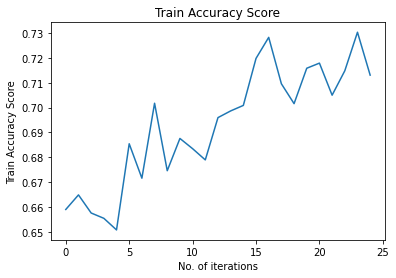

In [57]:
plt.title('Train Accuracy Score')
plt.xlabel('No. of iterations')
plt.ylabel('Train Accuracy Score')
plt.plot(np.reshape(train_accuracy_score,[len(train_accuracy_score),1]))
plt.ylim()
plt.xlim()
plt.show()

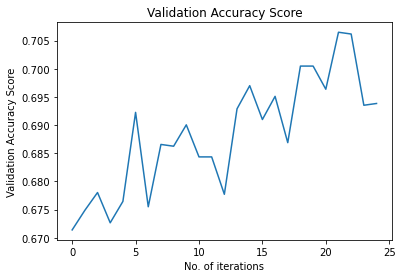

In [58]:
plt.title('Validation Accuracy Score')
plt.xlabel('No. of iterations')
plt.ylabel('Validation Accuracy Score')
plt.plot(np.reshape(cv_accuracy_score,[len(cv_accuracy_score),1]))
plt.ylim()
plt.xlim()
plt.show()

## Exercise 3: Implementing Hyperband for Logistic Regression

In [30]:
df2_train=df2.sample(frac=0.7,random_state=3116) 
df2_left=df2.drop(df2_train.index)
df2_cv=df2_left.sample(frac=0.5,random_state=3116) 
df2_test=df2_left.drop(df2_cv.index)

In [41]:
print(np.shape(df2))
print(np.shape(df2_train))
print(np.shape(df2_cv))
print(np.shape(df2_test))

(4521, 41)
(3165, 41)
(678, 41)
(678, 41)


In [42]:
X=df2_train.iloc[:,df2_train.columns !="y" ]
y=df2_train.iloc[:,df2_train.columns =="y" ]
X_val=df2_cv.iloc[:,df2_cv.columns !="y" ]
y_val=df2_cv.iloc[:,df2_cv.columns =="y" ]
X_test=df2_test.iloc[:,df2_cv.columns !="y" ]
y_test=df2_test.iloc[:,df2_cv.columns =="y" ]

In [43]:
def get_random_hyperparameter_configuration(N):
 
    alpha=np.random.uniform(0.001, 0.005, N)
    alpha=list(alpha)
    
    lambda1=np.random.uniform(0.01, 0.05, N)
    lambda1=list(lambda1)
    
    batch_size=np.random.uniform(50, 500, N)
    batch_size=list(batch_size)
    
    np.random.shuffle(alpha)
    np.random.shuffle(lambda1)
    np.random.shuffle(batch_size)
    return np.array([alpha[0],lambda1[0],batch_size[0]])


    

In [44]:
def logistic_regression_hyperband(X,y,X_val,y_val,mu,lambda1,batch_size,tmax,epsilon):
    beta=np.zeros((len(X.columns),1))

    for i in range(tmax):
        mini_batches = create_minibatch(X, y, batch_size)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            l=log_function(X_mini,y_mini,beta,lambda1)
            y_hat=return_yhat(X_mini,beta)
            gradient=find_gradient(X_mini,y_mini,y_hat,beta,lambda1)
            beta=beta+mu*gradient
        l=log_function(X,y,beta,lambda1)
    return ((-1)*log_loss_function(X_val,y_val,beta))


def log_function(X,y,beta,lambda1):
    mul=np.dot(X,beta)
    A=np.dot(y.T,np.dot(X,beta))
    l=A-np.log(1+np.exp(mul))
    regularisation_term=lambda1*(np.square(beta)).sum()
    return l.sum()-regularisation_term

def log_loss_function(X_val,y_val,beta):
    log_loss=0
    A=np.dot(X_val,beta)
    y_Pred=1.0 / (1.0 + np.exp(-A))
    log_loss=((y_val*np.log(y_Pred)+(1-y_val)*np.log(1-y_Pred))).mean()
    return log_loss


def return_yhat(X,beta):
    
    A=np.dot(X,beta)
    yhat=1.0 / (1.0 + np.exp(-A))
    return yhat


def find_gradient(X,y,y_hat,beta,lambda1):
    diff=y-y_hat
    grad=np.dot(X.T,diff)-2*lambda1*beta
    return grad
    
    

In [45]:
tmax=1
epsilon=1e-1
s=logistic_regression_hyperband(X,y,X_val,y_val,0.001,0.01,100,tmax,epsilon)
s.iloc[0]

0.6581916477501403

In [46]:
def run_then_return_val_loss(r_i,t):
    epsilon=1e-1
    loss=logistic_regression_hyperband(X,y,X_val,y_val,t[0],t[1],int(t[2]),r_i,epsilon)
    return loss.iloc[0]
    

In [47]:
max_iter = 81  # maximum iterations/epochs per configuration
eta = 3 # defines downsampling rate (default=3)
logeta = lambda x: log(x)/log(eta)
s_max = int(logeta(max_iter))  # number of unique executions of Successive Halving (minus one)
B = (s_max+1)*max_iter  # total number of iterations (without reuse) per execution of Succesive Halving (n,r)

#### Begin Finite Horizon Hyperband outlerloop. Repeat indefinetely.
for s in reversed(range(s_max+1)):
    n = int(ceil(int(B/max_iter/(s+1))*eta**s)) # initial number of configurations
    r = max_iter*eta**(-s) # initial number of iterations to run configurations for
#     print(r)
    #### Begin Finite Horizon Successive Halving with (n,r)
    T = [ get_random_hyperparameter_configuration(5) for i in range(n) ] 
#     print(T)
    for i in range(s+1):
        # Run each of the n_i configs for r_i iterations and keep best n_i/eta
        
        n_i = int(n*eta**(-i))
        r_i = int(r*eta**(i))
        print("Number of Iterations is",r_i)
        print("Length of Hyperparameter array T is",len(T))
        
        
        val_losses = [ run_then_return_val_loss(r_i,t) for t in T ]
#         a,b,c=np.shape(np.array(val_losses))
        
#         T = [ T[i[0]] for i in np.argsort(np.array(val_losses).reshape(a,b))[0:int( n_i/eta )] ]
        T = [ T[i] for i in np.argsort(val_losses)[0:int( n_i/eta )] ]
    #### End Finite Horizon Successive Halving with (n,r)


Number of Iterations is 1
Length of Hyperparameter array T is 81
Number of Iterations is 3
Length of Hyperparameter array T is 27
Number of Iterations is 9
Length of Hyperparameter array T is 9
Number of Iterations is 27
Length of Hyperparameter array T is 3
Number of Iterations is 81
Length of Hyperparameter array T is 1
Number of Iterations is 3
Length of Hyperparameter array T is 27
Number of Iterations is 9
Length of Hyperparameter array T is 9
Number of Iterations is 27
Length of Hyperparameter array T is 3
Number of Iterations is 81
Length of Hyperparameter array T is 1
Number of Iterations is 9
Length of Hyperparameter array T is 9
Number of Iterations is 27
Length of Hyperparameter array T is 3
Number of Iterations is 81
Length of Hyperparameter array T is 1
Number of Iterations is 27
Length of Hyperparameter array T is 6
Number of Iterations is 81
Length of Hyperparameter array T is 2
Number of Iterations is 81
Length of Hyperparameter array T is 5


In [48]:
print(T)

[array([1.32715209e-03, 2.16901267e-02, 4.02521930e+02])]


#### Taking this hyperparameter running the Model mu=1.32715209e-03,lambda1=2.16901267e-02,batch_size=400

In [49]:
def logistic_regression_final(X,y,X_test,Y_test,mu,lambda1,batch_size,tmax,epsilon):
    beta=np.zeros((len(X.columns),1))

    for i in range(tmax):
        mini_batches = create_minibatch(X, y, batch_size)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            l=log_function(X_mini,y_mini,beta,lambda1)
            y_hat=return_yhat(X_mini,beta)
            gradient=find_gradient(X_mini,y_mini,y_hat,beta,lambda1)
            beta=beta+mu*gradient
        l_old=l
        l=log_function(X_mini,y_mini,beta,lambda1)
        
        if (l-l_old < epsilon):
            A=np.dot(X_test,beta)
            Y_Pred_test=1.0 / (1.0 + np.exp(-A))
            accuracy=find_accuracy(Y_test,Y_Pred_test)
            return accuracy
        elif(i==tmax):
            return "Not converged"
 

def log_function(X,y,beta,lambda1):
    mul=np.dot(X,beta)
    A=np.dot(y.T,np.dot(X,beta))
    l=A-np.log(1+np.exp(mul))
    regularisation_term=lambda1*(np.square(beta)).sum()
    return l.sum()-regularisation_term

def log_loss_function(X_val,y_val,beta):
    log_loss=0
    A=np.dot(X_val,beta)
    y_Pred=1.0 / (1.0 + np.exp(-A))
    log_loss=((y_val*np.log(y_Pred)+(1-y_val)*np.log(1-y_Pred))).mean()
    return log_loss


def return_yhat(X,beta):
    
    A=np.dot(X,beta)
    yhat=1.0 / (1.0 + np.exp(-A))
    return yhat


def find_gradient(X,y,y_hat,beta,lambda1):
    diff=y-y_hat
    grad=np.dot(X.T,diff)-2*lambda1*beta
    return grad

def find_accuracy(y,Y_Pred):
    Y_Pred_new=[]
    count=0
    accuracy=0
    for i in Y_Pred:
        if i.item()>=0.5:
            Y_Pred_new.append(1)
        else:
            Y_Pred_new.append(0)
    for i in range(len(Y_Pred_new)-1):
        if (type(y).__module__ =='numpy'):
            if (y[i][0]==Y_Pred_new[i]):
                count+=1
        else:
            if (y.iloc[i].item()==Y_Pred_new[i]):
                count+=1
    accuracy=count/len(Y_Pred_new)
    return accuracy

In [50]:
accuracy=logistic_regression_final(X,y,X_test,y_test,T[0][0],T[0][1],int(T[0][2]),1000,1e-1)
print("Accuracy on Test Set using Hyperparameters are",accuracy)

Accuracy on Test Set using Hyperparameters are 0.7094395280235988


#### Thus a Great Improvement in Accuracy is displayed with Hyperband Optimisation Algorithm with accuracy of 70%.

##### References
 - https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
 - https://www.kite.com/python/answers/how-to-find-the-number-of-pandas-dataframe-columns-in-python
 - https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas
 - https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
 - https://stackoverflow.com/questions/59246090/how-to-generate-iid-sample-from-a-given-arbitrary-probability-density-function
 - https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/
 - https://homes.cs.washington.edu/~jamieson/hyperband.html
 - https://openreview.net/pdf?id=ry18Ww5ee
 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html